### Python 8: tvmaze.com dataset Insights

#### Insights to be drawn as per statements below:

Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
data = requests.get(url).json()

temp_list = []

for item in data["_embedded"]["episodes"]:
    item_dict ={
    "ID": item.get("id", ""),
    "URL": item.get("url", ""),
    "Name": item.get("name", ""),
    "Season": item.get("season", ""),
    "Number": item.get("number", ""),
    "Type": item.get("type", ""),
    "Air_Date": item.get("airdate", ""),
    "Air_Time": item.get("airtime", ""),
    "Air_Stamp": item.get("airstamp", ""),
    "Runtime": item.get("runtime", ""),
    "Rating": item.get("rating", {}).get("average",""),
    "Image_medium": item.get("image", {}).get("medium",""),
    "Image_original": item.get("image", {}).get("original",""),
    "Summary": BeautifulSoup(item['summary'], 'html.parser').get_text(),
    "Medium_image ": item.get("_links", {}).get("self", {}).get("href", ""),
    "Original_image ": item.get("_links", {}).get("show", {}).get("href", "")
        
    }

    temp_list.append(item_dict)
    
df = pd.DataFrame(temp_list)
df.head()

,ID,URL,Name,Season,Number,Type,Air_Date,Air_Time,Air_Stamp,Runtime,Rating,Image_medium,Image_original,Summary,Medium_image,Original_image
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,2016-10-03T01:00:00+00:00,68,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,A woman named Dolores is a free spirit in the ...,https://api.tvmaze.com/episodes/869671,https://api.tvmaze.com/shows/1371
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,2016-10-10T01:00:00+00:00,60,7.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,Bernard suspects that someone is sabotaging th...,https://api.tvmaze.com/episodes/911201,https://api.tvmaze.com/shows/1371
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,2016-10-17T01:00:00+00:00,60,7.6,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,Bernard continues to investigate Dolores' supp...,https://api.tvmaze.com/episodes/911204,https://api.tvmaze.com/shows/1371
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,2016-10-24T01:00:00+00:00,60,7.9,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,While Dolores joins William and Logan on their...,https://api.tvmaze.com/episodes/911205,https://api.tvmaze.com/shows/1371
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,2016-10-31T01:00:00+00:00,60,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,Dolores takes the first step on her path of di...,https://api.tvmaze.com/episodes/927174,https://api.tvmaze.com/shows/1371


#### Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.

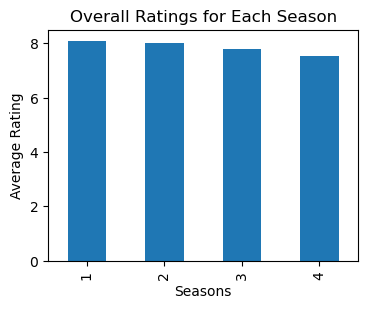

In [2]:
# Get all the overall ratings for each season and using plots compare the ratings for all the seasons:

# Convert 'Rating' column to numeric data type
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Get all the overall ratings for each season
season_ratings_df = df.groupby('Season')['Rating'].mean()

# Plot the ratings for all seasons
season_ratings_df.plot(kind='bar', figsize=(4,3))
plt.xlabel('Seasons')
plt.ylabel('Average Rating')
plt.title('Overall Ratings for Each Season')
plt.show()

#### Get all the episode names, whose average rating is more than 8 for every season

In [3]:
# Get all the episode names, whose average rating is more than 8 for every season

season_rating_gt_8 = df[df.groupby('Season')['Rating'].transform('mean') > 8]['Name']
season_rating_gt_8

# Method 2:
# season_rating_gt_8 = df.groupby('Season').filter(lambda x: x['Rating'].mean() > 8)['Name']

0                 The Original
1                     Chestnut
2                    The Stray
3            Dissonance Theory
4                  Contrapasso
5                The Adversary
6                Trompe L'Oeil
7                  Trace Decay
8    The Well-Tempered Clavier
9           The Bicameral Mind
Name: Name, dtype: object

#### Get all the episode names that aired before May 2019

In [4]:
# Get all the episode names that aired before May 2019

df[df["Air_Date"] < "2019-05-01"]["Name"]

0                  The Original
1                      Chestnut
2                     The Stray
3             Dissonance Theory
4                   Contrapasso
5                 The Adversary
6                 Trompe L'Oeil
7                   Trace Decay
8     The Well-Tempered Clavier
9            The Bicameral Mind
10           Journey Into Night
11                      Reunion
12              Virtù e Fortuna
13     The Riddle of the Sphinx
14                 Akane No Mai
15                  Phase Space
16                 Les Écorchés
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: Name, dtype: object

#### Get the episode name from each season with the highest and lowest rating

In [5]:
# Get the episode name from each season with the highest and lowest rating

df.loc[df.groupby('Season')['Rating'].idxmax()][['Season', 'Name', 'Rating']]

,Season,Name,Rating
9,1,The Bicameral Mind,8.7
17,2,Kiksuya,8.7
20,3,Parce Domine,8.0
32,4,Zhuangzi,7.8


In [6]:
# Here we are using reset_index(drop=True)

df.loc[df.groupby('Season')['Rating'].idxmin()][['Season', 'Name', 'Rating']].reset_index(drop=True)

,Season,Name,Rating
0,1,The Stray,7.6
1,2,Akane No Mai,7.6
2,3,Decoherence,7.5
3,4,The Auguries,7.1


#### Get the summary for the most popular ( ratings ) episode in every season

In [7]:
# Get the summary for the most popular ( ratings ) episode in every season

df.loc[df.groupby('Season')['Rating'].idxmax()][['Season', 'Name', 'Rating', 'Summary']]

,Season,Name,Rating,Summary
9,1,The Bicameral Mind,8.7,Delores finds out the truth about William's fa...
17,2,Kiksuya,8.7,Another of Westworld's Host revolutionaries is...
20,3,Parce Domine,8.0,"If you're stuck in a loop, try walking in a st..."
32,4,Zhuangzi,7.8,God is bored.
